In [1]:
import opendatasets as od
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_column", None)
matplotlib.rcParams["font.size"] = 14
matplotlib.rcParams["figure.figsize"] = (10,7)

sns.set_style("darkgrid")


In [2]:
#url ="https://www.kaggle.com/competitions/kaggle-survey-2022/data"
#od.download(url)

In [3]:
os.listdir('kaggle-survey-2022')

['kaggle_survey_2022_responses.csv', 'Supplementary Data']

In [4]:
df_raw = pd.read_csv("kaggle-survey-2022/kaggle_survey_2022_responses.csv",skiprows=[1])

In [5]:
df_raw.head()

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q6_8,Q6_9,Q6_10,Q6_11,Q6_12,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q7_6,Q7_7,Q8,Q9,Q10_1,Q10_2,Q10_3,Q11,Q12_1,Q12_2,Q12_3,Q12_4,Q12_5,Q12_6,Q12_7,Q12_8,Q12_9,Q12_10,Q12_11,Q12_12,Q12_13,Q12_14,Q12_15,Q13_1,Q13_2,Q13_3,Q13_4,Q13_5,Q13_6,Q13_7,Q13_8,Q13_9,Q13_10,Q13_11,Q13_12,Q13_13,Q13_14,Q14_1,Q14_2,Q14_3,Q14_4,Q14_5,Q14_6,Q14_7,Q14_8,Q14_9,Q14_10,Q14_11,Q14_12,Q14_13,Q14_14,Q14_15,Q14_16,Q15_1,Q15_2,Q15_3,Q15_4,Q15_5,Q15_6,Q15_7,Q15_8,Q15_9,Q15_10,Q15_11,Q15_12,Q15_13,Q15_14,Q15_15,Q16,Q17_1,Q17_2,Q17_3,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12,Q17_13,Q17_14,Q17_15,Q18_1,Q18_2,Q18_3,Q18_4,Q18_5,Q18_6,Q18_7,Q18_8,Q18_9,Q18_10,Q18_11,Q18_12,Q18_13,Q18_14,Q19_1,Q19_2,Q19_3,Q19_4,Q19_5,Q19_6,Q19_7,Q19_8,Q20_1,Q20_2,Q20_3,Q20_4,Q20_5,Q20_6,Q21_1,Q21_2,Q21_3,Q21_4,Q21_5,Q21_6,Q21_7,Q21_8,Q21_9,Q21_10,Q22,Q23,Q24,Q25,Q26,Q27,Q28_1,Q28_2,Q28_3,Q28_4,Q28_5,Q28_6,Q28_7,Q28_8,Q29,Q30,Q31_1,Q31_2,Q31_3,Q31_4,Q31_5,Q31_6,Q31_7,Q31_8,Q31_9,Q31_10,Q31_11,Q31_12,Q32,Q33_1,Q33_2,Q33_3,Q33_4,Q33_5,Q34_1,Q34_2,Q34_3,Q34_4,Q34_5,Q34_6,Q34_7,Q34_8,Q35_1,Q35_2,Q35_3,Q35_4,Q35_5,Q35_6,Q35_7,Q35_8,Q35_9,Q35_10,Q35_11,Q35_12,Q35_13,Q35_14,Q35_15,Q35_16,Q36_1,Q36_2,Q36_3,Q36_4,Q36_5,Q36_6,Q36_7,Q36_8,Q36_9,Q36_10,Q36_11,Q36_12,Q36_13,Q36_14,Q36_15,Q37_1,Q37_2,Q37_3,Q37_4,Q37_5,Q37_6,Q37_7,Q37_8,Q37_9,Q37_10,Q37_11,Q37_12,Q37_13,Q38_1,Q38_2,Q38_3,Q38_4,Q38_5,Q38_6,Q38_7,Q38_8,Q39_1,Q39_2,Q39_3,Q39_4,Q39_5,Q39_6,Q39_7,Q39_8,Q39_9,Q39_10,Q39_11,Q39_12,Q40_1,Q40_2,Q40_3,Q40_4,Q40_5,Q40_6,Q40_7,Q40_8,Q40_9,Q40_10,Q40_11,Q40_12,Q40_13,Q40_14,Q40_15,Q41_1,Q41_2,Q41_3,Q41_4,Q41_5,Q41_6,Q41_7,Q41_8,Q41_9,Q42_1,Q42_2,Q42_3,Q42_4,Q42_5,Q42_6,Q42_7,Q42_8,Q42_9,Q43,Q44_1,Q44_2,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
0,121,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,462,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,University Courses (resulting in a university ...,NaN,NaN,University courses,NaN,NaN,NaN,"Kaggle (notebooks, competitions, etc)",NaN,NaN,Master’s degree,Yes,NaN,NaN,No,1-3 years,NaN,NaN,NaN,NaN,NaN,NaN,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Notepad++,NaN,NaN,NaN,NaN,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,Matplotlib,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Under 1 year,Scikit-learn,TensorFlow,NaN,PyTorch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bayesian Approaches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"No, I do not download pre-trained model weight...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

# Data Preparation & Cleaning
While the survey responses contain a wealth of information, we'll limit our analysis to the following areas
1. Create a new dataframe
2. Joining columns with thesame question to a single column and add to new dataframe




In [6]:
df = pd.DataFrame()

In [7]:
duration = df_raw["Duration (in seconds)"]
age = df_raw["Q2"]
gender = df_raw["Q3"]
country = df_raw["Q4"]
student = df_raw["Q5"]
#On which platforms have you begun or completed data science courses? (Select all that apply)
learning_platform = df_raw[["Q6_1","Q6_2","Q6_3","Q6_4","Q6_5","Q6_6","Q6_7","Q6_8","Q6_9","Q6_10","Q6_11","Q6_12"]].apply(
lambda x: ";".join(x.dropna().astype(str)),axis =1)
#What products or platforms did you find to be most helpful when you first started studying data
useful_platform = df_raw[["Q7_1","Q7_2","Q7_3","Q7_4","Q7_5","Q7_6","Q7_7"]].apply(
lambda x: ";".join(x.dropna().astype(str)),axis =1)
#What is the highest level of formal education that you have attained or plan to attain within the next 2years?
edlevel = df_raw["Q8"]
#For how many years have you been writing code and/or programming?
year_code = df_raw["Q11"]
#What programming languages do you use on a regular basis? (Select all that apply)
language =  df_raw[["Q12_1","Q12_2","Q12_3","Q12_4","Q12_5","Q12_6","Q12_7","Q12_8","Q12_9","Q12_10","Q12_11",
                    "Q12_12","Q12_13","Q12_14","Q12_15"]].apply(lambda x: ";".join(x.dropna().astype(str)),axis =1)

#Which of the following integrated development environments (IDE's) do you use on a regular basis?(Select all that apply)
ide = df_raw[["Q13_1","Q13_2","Q13_3","Q13_4","Q13_5","Q12_6","Q13_7","Q13_8","Q13_9","Q13_10","Q13_11",
                    "Q13_12","Q13_13","Q13_14"]].apply(lambda x: ";".join(x.dropna().astype(str)),axis =1)
#Do you use any of the following data visualization libraries on a regular basis? (Select all that apply)
viz_lib = df_raw[["Q15_1","Q15_2","Q15_3","Q15_4","Q15_5","Q15_6","Q15_7","Q15_8","Q15_9","Q15_10","Q15_11",
                    "Q15_12","Q15_13","Q15_14","Q15_15"]].apply(lambda x: ";".join(x.dropna().astype(str)),axis =1)
#For how many years have you used machine learning methods?
ml_year = df_raw["Q16"]
ml_framewk = df_raw[["Q17_1","Q17_2","Q17_3","Q17_4","Q17_5","Q17_6","Q17_7","Q17_8","Q17_9","Q17_10","Q17_11",
                    "Q17_12","Q17_13","Q17_14","Q17_15"]].apply(lambda x: ";".join(x.dropna().astype(str)),axis =1)
#Which of the following ML algorithms do you use on a regular basis? (Select all that apply):
ml_algorithm = df_raw[["Q18_1","Q18_2","Q18_3","Q18_4","Q18_5","Q18_6","Q18_7","Q18_8","Q18_9","Q18_10","Q18_11",
                    "Q18_12","Q18_13","Q18_14"]].apply(lambda x: ";".join(x.dropna().astype(str)),axis =1)
#Select the title most similar to your current role (or most recent title if retired):
job_title = df_raw["Q23"]
#In what industry is your current employer/contract (or your most recent employer if retired)?
industry = df_raw["Q24"]
#What is your current yearly compensation (approximate $USD)?
salary = df_raw["Q29"]
#Which of the following cloud computing platforms do you use? (Select all that apply)
cloud_cpt = df_raw[["Q31_1","Q31_2","Q31_3","Q31_4","Q31_5","Q31_6","Q31_7","Q31_8","Q31_9","Q31_10","Q31_11",
                    "Q31_12"]].apply(lambda x: ";".join(x.dropna().astype(str)),axis =1)
#Do you use any of the following data products (relational databases, data warehouses, data lakes,or similar)?(Select all that apply)
#database = df_raw[["Q35_1","Q31_2","Q31_3","Q31_4","Q31_5","Q31_6","Q31_7","Q31_8","Q31_9","Q31_10","Q31_11",
                    #"Q31_12"]].apply(lambda x: ",".join(x.dropna().astype(str)),axis =1)


In [8]:
df = df.assign(duration=duration,
         age = age,
         country = country,
         gender = gender,
         student = student,
         learning_platform=learning_platform,
         useful_platform=useful_platform,
         edlevel = edlevel,
         year_code =year_code,
         language=language,
         ide=ide,
         viz_lib=viz_lib,
         ml_year=ml_year,
         ml_framewk=ml_framewk,
         ml_algorithm=ml_algorithm,
         job_title=job_title,
         industry=industry,
         salary=salary,
         cloud_cpt =cloud_cpt)

In [9]:
df.head()

,duration,age,country,gender,student,learning_platform,useful_platform,edlevel,year_code,language,ide,viz_lib,ml_year,ml_framewk,ml_algorithm,job_title,industry,salary,cloud_cpt
0,121,30-34,India,Man,No,Other,,NaN,NaN,,,,NaN,,,NaN,NaN,NaN,
1,462,30-34,Algeria,Man,No,University Courses (resulting in a university ...,"University courses;Kaggle (notebooks, competit...",Master’s degree,1-3 years,Java,Notepad++ ;Other,Matplotlib,Under 1 year,Scikit-learn ; TensorFlow ; PyTorch,Bayesian Approaches,NaN,NaN,NaN,
2,293,18-21,Egypt,Man,Yes,Coursera;edX;DataCamp;Udacity;Udemy;LinkedIn L...,"Online courses (Coursera, EdX, etc);Video plat...",Bachelor’s degree,1-3 years,Python;SQL;C;MATLAB,JupyterLab ; Jupyter Notebook,Matplotlib ; Seaborn ; Plotly / Plotly Expres...,1-2 years,Scikit-learn ; PyTorch ; Xgboost ; PyTorch L...,Linear or Logistic Regression;Decision Trees o...,NaN,NaN,NaN,
3,851,55-59,France,Man,No,Coursera;Kaggle Learn Courses;Udemy;Other,"Online courses (Coursera, EdX, etc);Kaggle (no...",Some college/university study without earning ...,10-20 years,Python;SQL;Bash,Visual Studio Code (VSCode) ; Sublime Text ...,Matplotlib ; Seaborn,1-2 years,Scikit-learn ; PyTorch ; Huggingface,"Transformer Networks (BERT, gpt-3, etc)",Data Scientist,Online Service/Internet-based Services,"25,000-29,999",Other
4,232,45-49,India,Man,Yes,Other,University courses,Bachelor’s degree,5-10 years,Python;C++;Java,Visual Studio Code (VSCode) ; PyCharm ;C++; ...,None,I do not use machine learning methods,,,NaN,NaN,NaN,


In [10]:
df.to_csv("kaggle_Eda.csv", index = False)

In [11]:
df = pd.read_csv("kaggle_Eda.csv")

In [12]:
df.head()

,duration,age,country,gender,student,learning_platform,useful_platform,edlevel,year_code,language,ide,viz_lib,ml_year,ml_framewk,ml_algorithm,job_title,industry,salary,cloud_cpt
0,121,30-34,India,Man,No,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,462,30-34,Algeria,Man,No,University Courses (resulting in a university ...,"University courses;Kaggle (notebooks, competit...",Master’s degree,1-3 years,Java,Notepad++ ;Other,Matplotlib,Under 1 year,Scikit-learn ; TensorFlow ; PyTorch,Bayesian Approaches,NaN,NaN,NaN,NaN
2,293,18-21,Egypt,Man,Yes,Coursera;edX;DataCamp;Udacity;Udemy;LinkedIn L...,"Online courses (Coursera, EdX, etc);Video plat...",Bachelor’s degree,1-3 years,Python;SQL;C;MATLAB,JupyterLab ; Jupyter Notebook,Matplotlib ; Seaborn ; Plotly / Plotly Expres...,1-2 years,Scikit-learn ; PyTorch ; Xgboost ; PyTorch L...,Linear or Logistic Regression;Decision Trees o...,NaN,NaN,NaN,NaN
3,851,55-59,France,Man,No,Coursera;Kaggle Learn Courses;Udemy;Other,"Online courses (Coursera, EdX, etc);Kaggle (no...",Some college/university study without earning ...,10-20 years,Python;SQL;Bash,Visual Studio Code (VSCode) ; Sublime Text ...,Matplotlib ; Seaborn,1-2 years,Scikit-learn ; PyTorch ; Huggingface,"Transformer Networks (BERT, gpt-3, etc)",Data Scientist,Online Service/Internet-based Services,"25,000-29,999",Other
4,232,45-49,India,Man,Yes,Other,University courses,Bachelor’s degree,5-10 years,Python;C++;Java,Visual Studio Code (VSCode) ; PyCharm ;C++; ...,None,I do not use machine learning methods,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.shape

(23997, 19)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23997 entries, 0 to 23996
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   duration           23997 non-null  int64 
 1   age                23997 non-null  object
 2   country            23997 non-null  object
 3   gender             23997 non-null  object
 4   student            23997 non-null  object
 5   learning_platform  23997 non-null  object
 6   useful_platform    23696 non-null  object
 7   edlevel            23398 non-null  object
 8   year_code          23243 non-null  object
 9   language           21135 non-null  object
 10  ide                20596 non-null  object
 11  viz_lib            19765 non-null  object
 12  ml_year            19886 non-null  object
 13  ml_framewk         16240 non-null  object
 14  ml_algorithm       15864 non-null  object
 15  job_title          10630 non-null  object
 16  industry           9094 non-null   objec

In [15]:
df.duplicated().sum()

1

In [16]:
df = df.drop_duplicates()


In [17]:
df.loc[df["duration"]>300].shape

(16324, 19)

# Exploratory Analysis And Visualization
Before we ask questions about the survey responses, it would help to understand the respondents' demographics, i.e., country, age, gender, education level, employment level, etc.


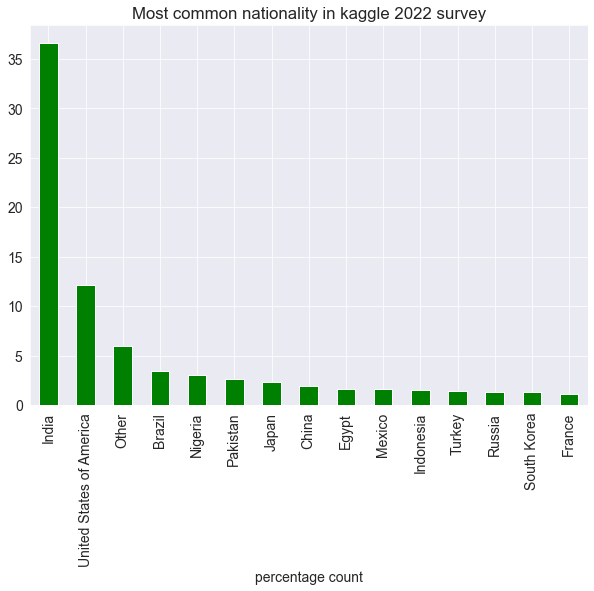

In [18]:
country_perc =df["country"].value_counts( normalize = True)*100
high_country = country_perc[:15]
high_country.plot(kind = "bar", color = "g")
plt.title("Most common nationality in kaggle 2022 survey")
plt.xlabel("percentage count");



From the above plot we can see that about 50 percent of kaggle users are from india and USA.


Text(0, 0.5, 'Percentage count')

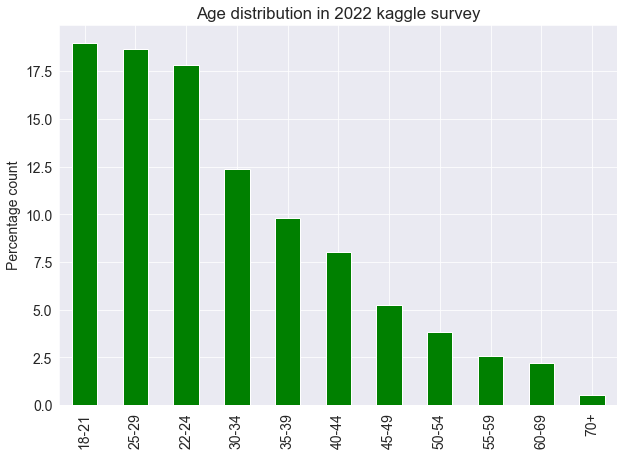

In [19]:
(df["age"].value_counts(normalize= True)*100).plot(kind = "bar", color = "g")
plt.title("Age distribution in 2022 kaggle survey")
plt.ylabel("Percentage count")

More than 50 percent of kaggle user are youths between the age of 18 to 39

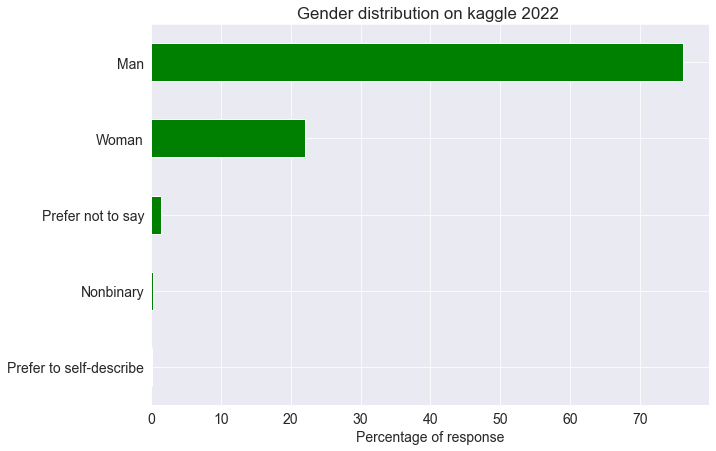

In [20]:
(df['gender'].value_counts(normalize= True)*100).sort_values().plot(kind = "barh", color ="g")
plt.title("Gender distribution on kaggle 2022 ")
plt.xlabel("Percentage of response");

There is a huge gender gap in the data career.
We should encourage and support women to make transition into any data career path in order to bridge the huge gender gap

In [21]:
student = df["student"].value_counts(normalize = True)*100

In [22]:
student

No     50.15836
Yes    49.84164
Name: student, dtype: float64

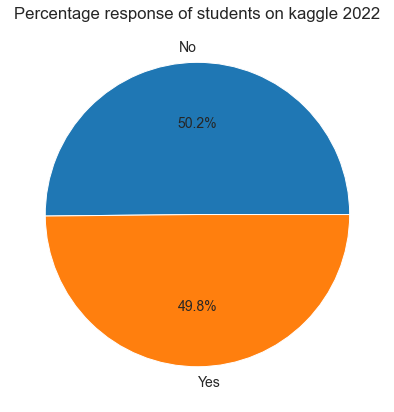

In [23]:
plt.pie(x = student, labels = student.index, autopct='%1.1f%%')
plt.title("Percentage response of students on kaggle 2022");

In [24]:
edu_level = df["edlevel"].value_counts(normalize = True)*100
edu_level

Master’s degree                                                      39.071716
Bachelor’s degree                                                    32.588255
Doctoral degree                                                      11.355671
Some college/university study without earning a bachelor’s degree     6.115907
I prefer not to answer                                                5.957774
Professional doctorate                                                2.500214
No formal education past high school                                  2.410462
Name: edlevel, dtype: float64

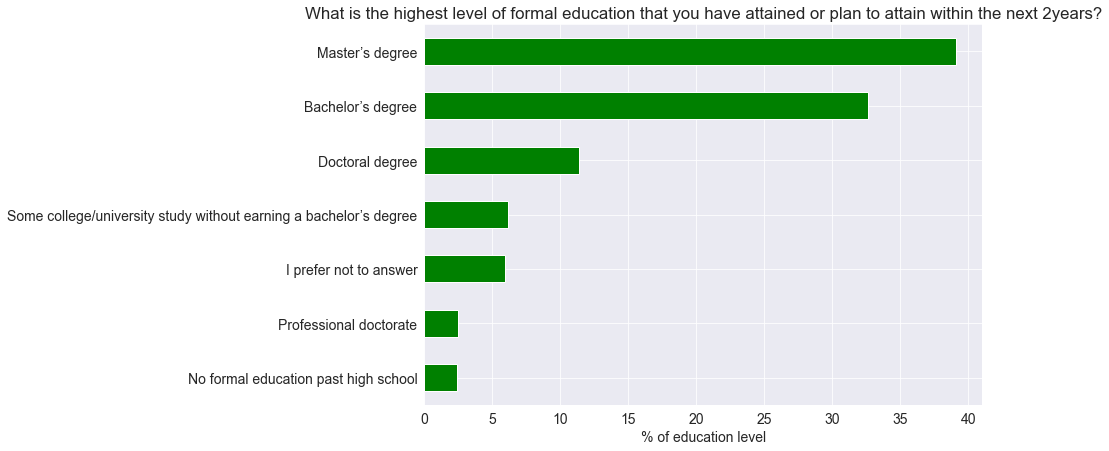

In [25]:
edu_level.sort_values().plot(kind = "barh", color = "g")
plt.title("What is the highest level of formal education that you have attained or plan to attain within the next 2years?")
plt.xlabel("% of education level");


In [26]:
year_code = df["year_code"].value_counts(normalize = True)*100
year_code

1-3 years                    27.789012
< 1 years                    23.465129
3-5 years                    14.623758
5-10 years                   10.996859
I have never written code     8.763929
10-20 years                   7.748569
20+ years                     6.612744
Name: year_code, dtype: float64

Text(0, 0.5, '% of year code')

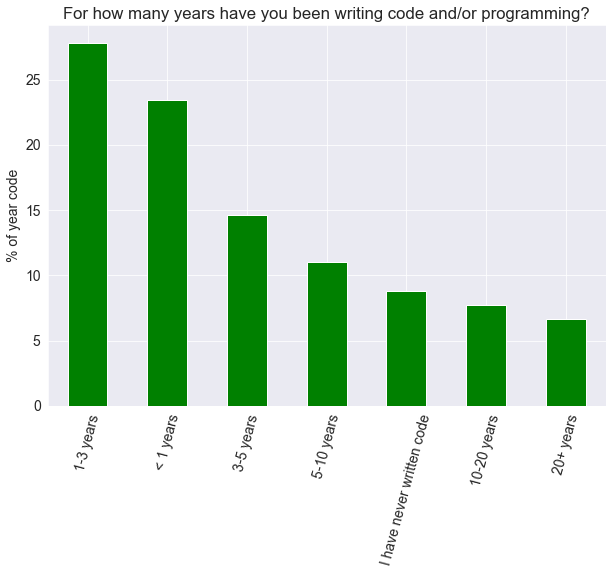

In [27]:
year_code.plot(kind ="bar", color= "g")
plt.xticks(rotation =75)
plt.title("For how many years have you been writing code and/or programming?")
plt.ylabel("% of year code")

Write a helper function to split columns since some columns such as learning platform has multiple selection

In [28]:
def split_multiple_col(col_series):
    result_df = col_series.to_frame()
    options = list()
    for position, value in col_series[col_series.notnull()].iteritems():
        for option in value.split(";"):
            if not option in result_df:
                
                options.append(option)
                result_df[option] = False
                
            result_df.at[position,option] = True
    return result_df[options]        
        
    

In [29]:
col_series = df["learning_platform"]
learn_platform = split_multiple_col(col_series)

In [30]:
learn_platform.head()

,Other,University Courses (resulting in a university degree),Coursera,edX,DataCamp,Udacity,Udemy,LinkedIn Learning,Kaggle Learn Courses,"Cloud-certification programs (direct from AWS, Azure, GCP, or similar)",Fast.ai,None
0,True,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False
2,False,True,True,True,True,True,True,True,False,False,False,False
3,True,False,True,False,False,False,True,False,True,False,False,False
4,True,False,False,False,False,False,False,False,False,False,False,False


In [31]:
learn_platform.sum()

Other                                                                     5669
University Courses (resulting in a university degree)                     6780
Coursera                                                                  9699
edX                                                                       2474
DataCamp                                                                  3718
Udacity                                                                   2199
Udemy                                                                     6115
LinkedIn Learning                                                         2766
Kaggle Learn Courses                                                      6628
Cloud-certification programs (direct from AWS, Azure, GCP, or similar)    1821
Fast.ai                                                                    944
None                                                                      2643
dtype: int64

In [32]:
perc_learn_platform = learn_platform.sum()/learn_platform.count()*100
perc_learn_platform

Other                                                                     23.624771
University Courses (resulting in a university degree)                     28.254709
Coursera                                                                  40.419237
edX                                                                       10.310052
DataCamp                                                                  15.494249
Udacity                                                                    9.164027
Udemy                                                                     25.483414
LinkedIn Learning                                                         11.526921
Kaggle Learn Courses                                                      27.621270
Cloud-certification programs (direct from AWS, Azure, GCP, or similar)     7.588765
Fast.ai                                                                    3.933989
None                                                                      11

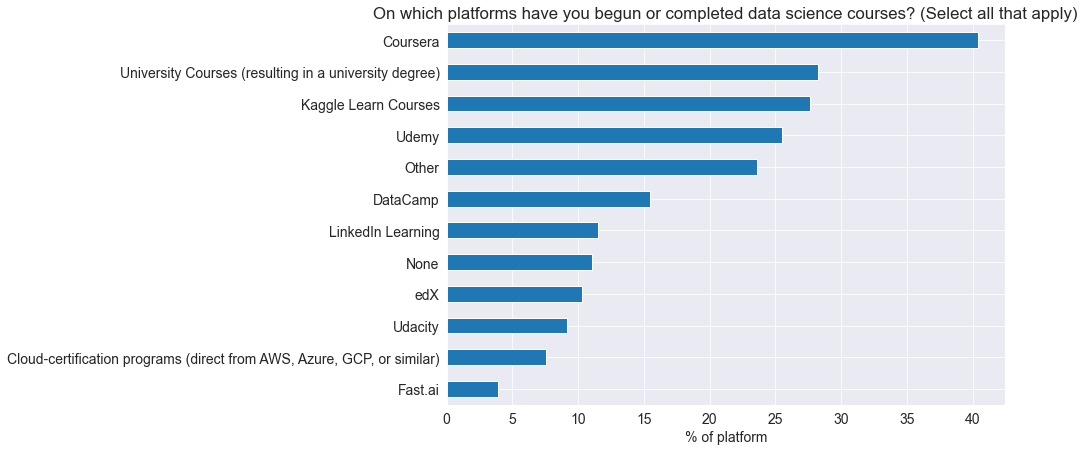

In [33]:
perc_learn_platform.sort_values().plot(kind = "barh")
plt.xlabel("% of platform")
plt.title("On which platforms have you begun or completed data science courses? (Select all that apply)");

In [34]:
useful_platform =split_multiple_col(df.useful_platform)
useful_platform.head()

,University courses,"Kaggle (notebooks, competitions, etc)","Online courses (Coursera, EdX, etc)","Video platforms (YouTube, Twitch, etc)",Other,"Social media platforms (Reddit, Twitter, etc)",None / I do not study data science
0,False,False,False,False,False,False,False
1,True,True,False,False,False,False,False
2,False,True,True,True,False,False,False
3,False,True,True,False,False,False,False
4,True,False,False,False,False,False,False


In [35]:
useful_platform.sum()

University courses                                6851
Kaggle (notebooks, competitions, etc)            12700
Online courses (Coursera, EdX, etc)              13714
Video platforms (YouTube, Twitch, etc)           12871
Other                                             1944
Social media platforms (Reddit, Twitter, etc)     3310
None / I do not study data science                1022
dtype: int64

In [36]:
perc_useful_platform = useful_platform.sum()/useful_platform.count()*100
perc_useful_platform

University courses                               28.550592
Kaggle (notebooks, competitions, etc)            52.925488
Online courses (Coursera, EdX, etc)              57.151192
Video platforms (YouTube, Twitch, etc)           53.638106
Other                                             8.101350
Social media platforms (Reddit, Twitter, etc)    13.793966
None / I do not study data science                4.259043
dtype: float64

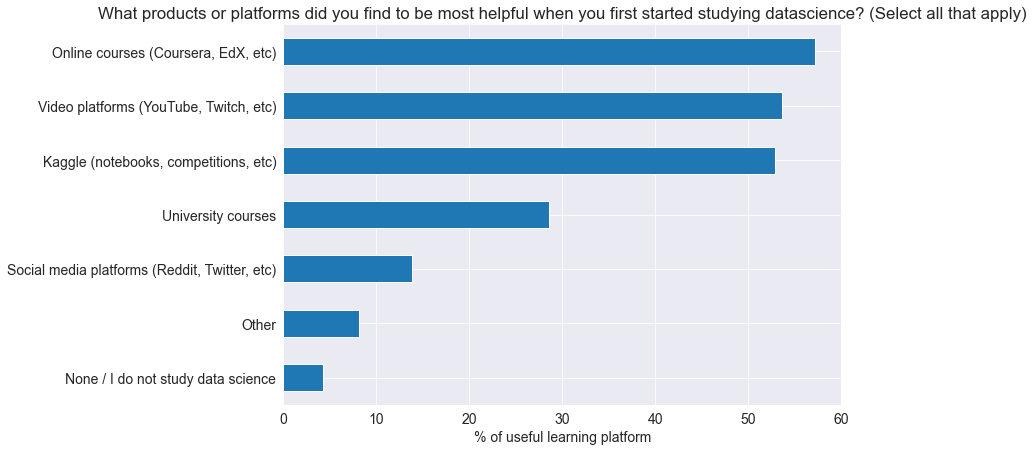

In [37]:
perc_useful_platform.sort_values().plot(kind = "barh")
plt.xlabel("% of useful learning platform")
plt.title("What products or platforms did you find to be most helpful when you first started studying datascience? (Select all that apply)");

In [38]:
language = split_multiple_col(df.language)
language.head()

,Java,Python,SQL,C,MATLAB,Bash,C++,Javascript,PHP,R,C#,Other,Go,Julia,None
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False
3,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False
4,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False


In [39]:
language.sum()

Java           3862
Python        18653
SQL            9620
C              3801
MATLAB         2441
Bash           1674
C++            4549
Javascript     3489
PHP            1443
R              4571
C#             1473
Other          1342
Go              322
Julia           296
None            256
dtype: int64

In [40]:
perc_language = language.sum()/language.count()*100
perc_language

Java          16.094349
Python        77.733789
SQL           40.090015
C             15.840140
MATLAB        10.172529
Bash           6.976163
C++           18.957326
Javascript    14.539923
PHP            6.013502
R             19.049008
C#             6.138523
Other          5.592599
Go             1.341890
Julia          1.233539
None           1.066844
dtype: float64

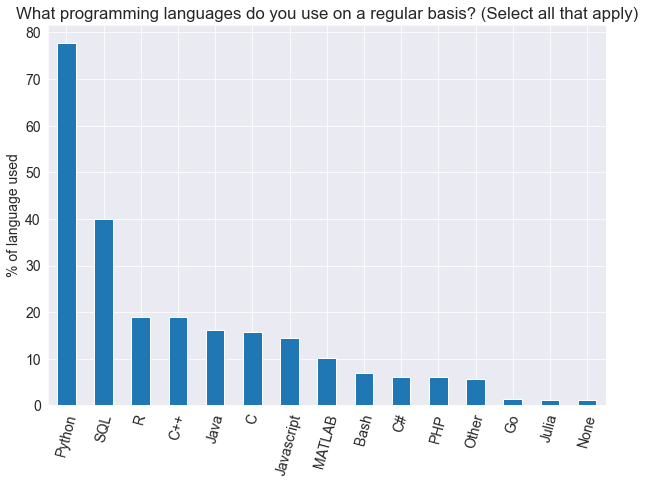

In [41]:
perc_language.sort_values(ascending=False).plot(kind = "bar")
plt.title("What programming languages do you use on a regular basis? (Select all that apply)")
plt.ylabel("% of language used")
plt.xticks(rotation =75);

Python is the most used laguage by kagglers followed by a data base language SQL

In [42]:
df_DS = df.loc[df["job_title"] =='Data Scientist']

In [43]:
df_DS.head()

,duration,age,country,gender,student,learning_platform,useful_platform,edlevel,year_code,language,ide,viz_lib,ml_year,ml_framewk,ml_algorithm,job_title,industry,salary,cloud_cpt
3,851,55-59,France,Man,No,Coursera;Kaggle Learn Courses;Udemy;Other,"Online courses (Coursera, EdX, etc);Kaggle (no...",Some college/university study without earning ...,10-20 years,Python;SQL;Bash,Visual Studio Code (VSCode) ; Sublime Text ...,Matplotlib ; Seaborn,1-2 years,Scikit-learn ; PyTorch ; Huggingface,"Transformer Networks (BERT, gpt-3, etc)",Data Scientist,Online Service/Internet-based Services,"25,000-29,999",Other
16,679,40-44,United States of America,Man,No,Coursera;Udacity;Udemy;Cloud-certification pro...,University courses;Social media platforms (Red...,Master’s degree,10-20 years,Python;SQL;C;C#;Javascript;Bash,JupyterLab ; Visual Studio ; Visual Studio Cod...,Matplotlib ; Seaborn ; Plotly / Plotly Expres...,5-10 years,Scikit-learn ; TensorFlow ; Keras ; PyTorch...,Linear or Logistic Regression;Decision Trees o...,Data Scientist,Computers/Technology,"200,000-249,999",Amazon Web Services (AWS) ; Microsoft Azure
17,10619,30-34,United States of America,Man,No,Coursera;Kaggle Learn Courses;Udacity;Udemy,"University courses;Online courses (Coursera, E...",Master’s degree,5-10 years,Python;SQL;Bash,JupyterLab ; Visual Studio Code (VSCode) ; Jup...,Matplotlib ; Seaborn ;Other,2-3 years,Scikit-learn ; Keras ; Xgboost ; LightGBM ; ...,Linear or Logistic Regression;Decision Trees o...,Data Scientist,Accounting/Finance,"150,000-199,999",Amazon Web Services (AWS) ; Google Cloud Plat...
29,1481,35-39,Chile,Man,No,DataCamp;Cloud-certification programs (direct ...,University courses;Other,Bachelor’s degree,5-10 years,Python;R;SQL,JupyterLab ; RStudio ; Notepad++ ; Sublime ...,Matplotlib ; Seaborn ; Ggplot / ggplot2,4-5 years,Scikit-learn ; Xgboost,Linear or Logistic Regression;Decision Trees o...,Data Scientist,Marketing/CRM,"50,000-59,999",Amazon Web Services (AWS)
35,506,25-29,Japan,Man,No,Udemy,"Online courses (Coursera, EdX, etc)",Master’s degree,3-5 years,Python,Visual Studio Code (VSCode) ; Jupyter Notebook,Seaborn,2-3 years,Scikit-learn ; PyTorch ; Xgboost ; LightGBM ...,Decision Trees or Random Forests;Dense Neural ...,Data Scientist,Computers/Technology,"50,000-59,999",Google Cloud Platform (GCP)


In [44]:
Ds_framework =split_multiple_col(df_DS["ml_framewk"])

Text(0, 0.5, '% count')

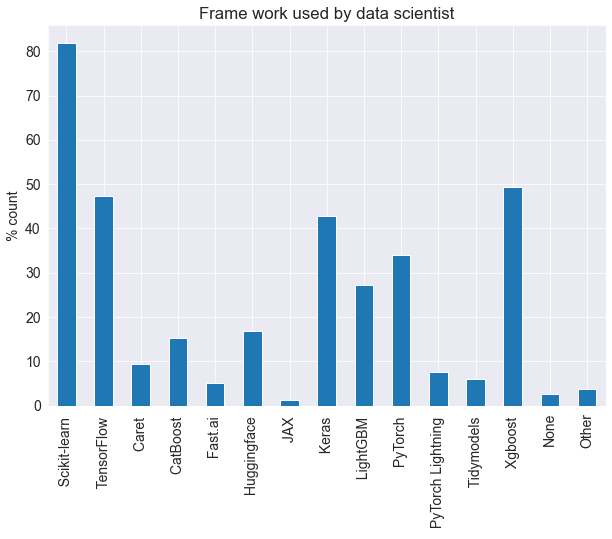

In [45]:
(Ds_framework.sum().sort_values(ascending=False)/Ds_framework.count()*100).plot(kind = "bar")
plt.title("Frame work used by data scientist")
plt.ylabel("% count")

In [46]:
df_ide = split_multiple_col(df["ide"])
df_ide.head()

,Notepad++,Other,JupyterLab,Jupyter Notebook,Visual Studio Code (VSCode),Sublime Text,Vim / Emacs,PyCharm,C++,IntelliJ,Visual Studio,RStudio,MATLAB,None
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,True,True,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,True,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,True,True,True,False,False,False,False,False,False,False
4,True,False,False,False,True,False,False,True,True,False,False,False,False,False


In [47]:
perc_ide = (df_ide.sum()/df_ide.count()*100).sort_values(ascending=False)
perc_ide

 Jupyter Notebook                57.026171
 Visual Studio Code (VSCode)     41.573596
 PyCharm                         25.416736
JupyterLab                       20.365894
C++                              18.957326
 Visual Studio                   18.403067
  Notepad++                      16.215203
 RStudio                         15.935989
 MATLAB                           9.593266
  Sublime Text                    9.243207
IntelliJ                          6.717786
Other                             6.142690
  Vim / Emacs                     6.034339
None                              1.704451
dtype: float64

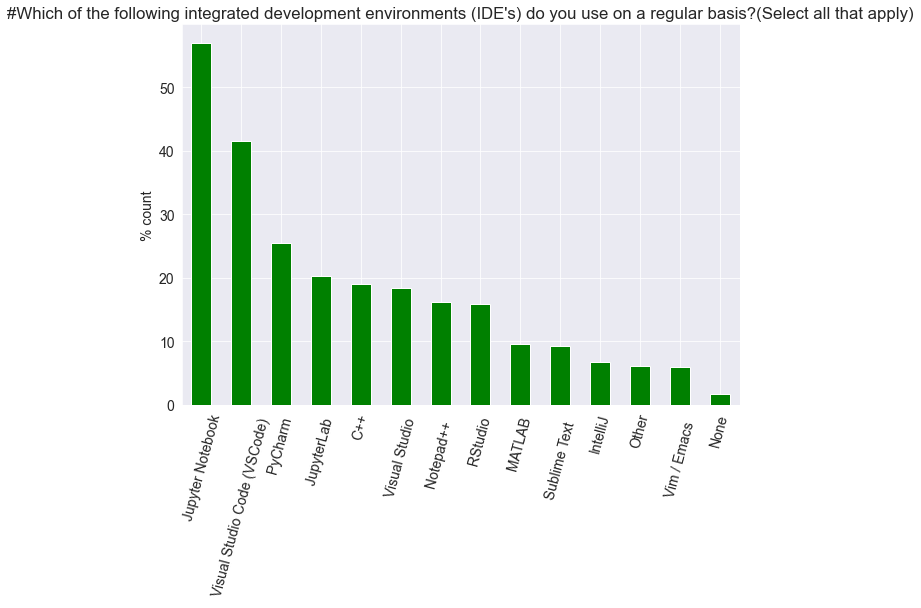

In [48]:
perc_ide.plot(kind = "bar", color = "g")
plt.title("#Which of the following integrated development environments (IDE's) do you use on a regular basis?(Select all that apply)")
plt.ylabel("% count")
plt.xticks(rotation = 75);

In [49]:
df_ml_algorithm = split_multiple_col(df["ml_algorithm"])
df_ml_algorithm.sum()

Bayesian Approaches                                     3661
Linear or Logistic Regression                          11338
Decision Trees or Random Forests                        9373
Gradient Boosting Machines (xgboost, lightgbm, etc)     5506
Transformer Networks (BERT, gpt-3, etc)                 2196
Recurrent Neural Networks                               3451
Graph Neural Networks                                   1422
Evolutionary Approaches                                  823
Dense Neural Networks (MLPs, etc)                       3476
Convolutional Neural Networks                           6006
Generative Adversarial Networks                         1166
Autoencoder Networks (DAE, VAE, etc)                    1234
None                                                    1326
Other                                                    538
dtype: int64

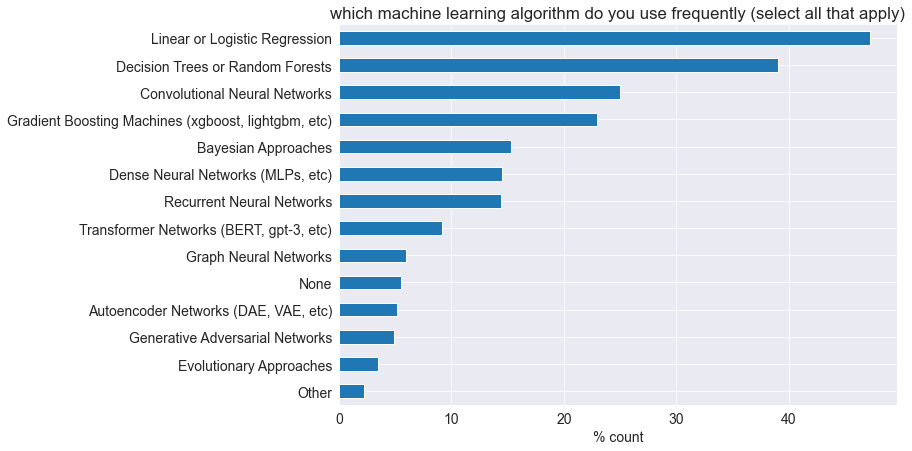

In [50]:
(df_ml_algorithm.sum()/df_ml_algorithm.count()*100).sort_values().plot(kind = "barh")
plt.xlabel("% count")
plt.title("which machine learning algorithm do you use frequently (select all that apply)");

In [51]:
df.groupby(["industry"])["job_title"].count()

industry
Academics/Education                       1447
Accounting/Finance                         802
Broadcasting/Communications                179
Computers/Technology                      2321
Energy/Mining                              320
Government/Public Service                  500
Insurance/Risk Assessment                  256
Manufacturing/Fabrication                  561
Marketing/CRM                              246
Medical/Pharmaceutical                     509
Non-profit/Service                         194
Online Service/Internet-based Services     461
Other                                      750
Retail/Sales                               398
Shipping/Transportation                    150
Name: job_title, dtype: int64

In [52]:
df

,duration,age,country,gender,student,learning_platform,useful_platform,edlevel,year_code,language,ide,viz_lib,ml_year,ml_framewk,ml_algorithm,job_title,industry,salary,cloud_cpt
0,121,30-34,India,Man,No,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,462,30-34,Algeria,Man,No,University Courses (resulting in a university ...,"University courses;Kaggle (notebooks, competit...",Master’s degree,1-3 years,Java,Notepad++ ;Other,Matplotlib,Under 1 year,Scikit-learn ; TensorFlow ; PyTorch,Bayesian Approaches,NaN,NaN,NaN,NaN
2,293,18-21,Egypt,Man,Yes,Coursera;edX;DataCamp;Udacity;Udemy;LinkedIn L...,"Online courses (Coursera, EdX, etc);Video plat...",Bachelor’s degree,1-3 years,Python;SQL;C;MATLAB,JupyterLab ; Jupyter Notebook,Matplotlib ; Seaborn ; Plotly / Plotly Expres...,1-2 years,Scikit-learn ; PyTorch ; Xgboost ; PyTorch L...,Linear or Logistic Regression;Decision Trees o...,NaN,NaN,NaN,NaN
3,851,55-59,France,Man,No,Coursera;Kaggle Learn Courses;Udemy;Other,"Online courses (Coursera, EdX, etc);Kaggle (no...",Some college/university study without earning ...,10-20 years,Python;SQL;Bash,Visual Studio Code (VSCode) ; Sublime Text ...,Matplotlib ; Seaborn,1-2 years,Scikit-learn ; PyTorch ; Huggingface,"Transformer Networks (BERT, gpt-3, etc)",Data Scientist,Online Service/Internet-based Services,"25,000-29,999",Other
4,232,45-49,India,Man,Yes,Other,University courses,Bachelor’s degree,5-10 years,Python;C++;Java,Visual Studio Code (VSCode) ; PyCharm ;C++; ...,None,I do not use machine learning methods,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23992,331,22-24,United States of America,Man,Yes,None,"University courses;Video platforms (YouTube, T...",Master’s degree,3-5 years,Python;R;SQL,RStudio ; Visual Studio Code (VSCode) ; PyCha...,Matplotlib ; Seaborn ; Ggplot / ggplot2,1-2 years,Scikit-learn ; TensorFlow ; Keras ; PyTorch...,Linear or Logistic Regression;Decision Trees o...,NaN,NaN,NaN,NaN
23993,330,60-69,United States of America,Man,Yes,University Courses (resulting in a university ...,"University courses;Video platforms (YouTube, T...",Bachelor’s degree,20+ years,Python;SQL,Other,None,2-3 years,None,Linear or Logistic Regression;Decision Trees o...,NaN,NaN,NaN,NaN
23994,860,25-29,Turkey,Man,No,DataCamp;Udemy,"Online courses (Coursera, EdX, etc);Social med...",Master’s degree,< 1 years,Python;SQL,PyCharm ; Jupyter Notebook,Seaborn,Under 1 year,Xgboost ; LightGBM ; CatBoost,Linear or Logistic Regression;Decision Trees o...,Engineer (non-software),Energy/Mining,"25,000-29,999",Microsoft Azure
23995,597,35-39,Israel,Woman,No,Kaggle Learn Courses;Udacity;University Course...,"Kaggle (notebooks, competitions, etc)",Doctoral degree,3-5 years,Python;R;Bash,RStudio ; PyCharm ; Notepad++,Matplotlib ; Ggplot / ggplot2,Under 1 year,Scikit-learn,Decision Trees or Random Forests,Research Scientist,Academics/Education,"15,000-19,999",NaN


In [53]:
df["country"].nunique()

58

In [54]:
df_raw

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q6_8,Q6_9,Q6_10,Q6_11,Q6_12,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q7_6,Q7_7,Q8,Q9,Q10_1,Q10_2,Q10_3,Q11,Q12_1,Q12_2,Q12_3,Q12_4,Q12_5,Q12_6,Q12_7,Q12_8,Q12_9,Q12_10,Q12_11,Q12_12,Q12_13,Q12_14,Q12_15,Q13_1,Q13_2,Q13_3,Q13_4,Q13_5,Q13_6,Q13_7,Q13_8,Q13_9,Q13_10,Q13_11,Q13_12,Q13_13,Q13_14,Q14_1,Q14_2,Q14_3,Q14_4,Q14_5,Q14_6,Q14_7,Q14_8,Q14_9,Q14_10,Q14_11,Q14_12,Q14_13,Q14_14,Q14_15,Q14_16,Q15_1,Q15_2,Q15_3,Q15_4,Q15_5,Q15_6,Q15_7,Q15_8,Q15_9,Q15_10,Q15_11,Q15_12,Q15_13,Q15_14,Q15_15,Q16,Q17_1,Q17_2,Q17_3,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12,Q17_13,Q17_14,Q17_15,Q18_1,Q18_2,Q18_3,Q18_4,Q18_5,Q18_6,Q18_7,Q18_8,Q18_9,Q18_10,Q18_11,Q18_12,Q18_13,Q18_14,Q19_1,Q19_2,Q19_3,Q19_4,Q19_5,Q19_6,Q19_7,Q19_8,Q20_1,Q20_2,Q20_3,Q20_4,Q20_5,Q20_6,Q21_1,Q21_2,Q21_3,Q21_4,Q21_5,Q21_6,Q21_7,Q21_8,Q21_9,Q21_10,Q22,Q23,Q24,Q25,Q26,Q27,Q28_1,Q28_2,Q28_3,Q28_4,Q28_5,Q28_6,Q28_7,Q28_8,Q29,Q30,Q31_1,Q31_2,Q31_3,Q31_4,Q31_5,Q31_6,Q31_7,Q31_8,Q31_9,Q31_10,Q31_11,Q31_12,Q32,Q33_1,Q33_2,Q33_3,Q33_4,Q33_5,Q34_1,Q34_2,Q34_3,Q34_4,Q34_5,Q34_6,Q34_7,Q34_8,Q35_1,Q35_2,Q35_3,Q35_4,Q35_5,Q35_6,Q35_7,Q35_8,Q35_9,Q35_10,Q35_11,Q35_12,Q35_13,Q35_14,Q35_15,Q35_16,Q36_1,Q36_2,Q36_3,Q36_4,Q36_5,Q36_6,Q36_7,Q36_8,Q36_9,Q36_10,Q36_11,Q36_12,Q36_13,Q36_14,Q36_15,Q37_1,Q37_2,Q37_3,Q37_4,Q37_5,Q37_6,Q37_7,Q37_8,Q37_9,Q37_10,Q37_11,Q37_12,Q37_13,Q38_1,Q38_2,Q38_3,Q38_4,Q38_5,Q38_6,Q38_7,Q38_8,Q39_1,Q39_2,Q39_3,Q39_4,Q39_5,Q39_6,Q39_7,Q39_8,Q39_9,Q39_10,Q39_11,Q39_12,Q40_1,Q40_2,Q40_3,Q40_4,Q40_5,Q40_6,Q40_7,Q40_8,Q40_9,Q40_10,Q40_11,Q40_12,Q40_13,Q40_14,Q40_15,Q41_1,Q41_2,Q41_3,Q41_4,Q41_5,Q41_6,Q41_7,Q41_8,Q41_9,Q42_1,Q42_2,Q42_3,Q42_4,Q42_5,Q42_6,Q42_7,Q42_8,Q42_9,Q43,Q44_1,Q44_2,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
0,121,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,462,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,University Courses (resulting in a university ...,NaN,NaN,University courses,NaN,NaN,NaN,"Kaggle (notebooks, competitions, etc)",NaN,NaN,Master’s degree,Yes,NaN,NaN,No,1-3 years,NaN,NaN,NaN,NaN,NaN,NaN,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Notepad++,NaN,NaN,NaN,NaN,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,Matplotlib,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Under 1 year,Scikit-learn,TensorFlow,NaN,PyTorch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bayesian Approaches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"No, I do not download pre-trained model weight...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [55]:
df_ds = df_raw.loc[df_raw["Q23"] == "Data Scientist"]

In [56]:
def joinCols(df1,col):
    sub_q_7 = [q for q in df1.columns[1:] if q.split('_')[0] == col]
    combo_series = df1[sub_q_7].apply(lambda x : ";".join(x.dropna().astype(str)), axis = 1)
        
    return combo_series
    


In [57]:
col ="Q17"
df1 = df_ds
ds_framwk_df = joinCols(df1,col)


In [58]:
split_multiple_col(ds_framwk_df).sum()

  Scikit-learn         1578
 PyTorch                654
 Huggingface            327
  TensorFlow            911
 Keras                  828
 LightGBM               526
 CatBoost               294
 Xgboost                954
 Fast.ai                 98
 Tidymodels             115
 PyTorch Lightning      147
 Caret                  180
None                     52
Other                    72
                        102
 JAX                     24
dtype: int64

In [59]:
df_raw.head()

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q6_8,Q6_9,Q6_10,Q6_11,Q6_12,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q7_6,Q7_7,Q8,Q9,Q10_1,Q10_2,Q10_3,Q11,Q12_1,Q12_2,Q12_3,Q12_4,Q12_5,Q12_6,Q12_7,Q12_8,Q12_9,Q12_10,Q12_11,Q12_12,Q12_13,Q12_14,Q12_15,Q13_1,Q13_2,Q13_3,Q13_4,Q13_5,Q13_6,Q13_7,Q13_8,Q13_9,Q13_10,Q13_11,Q13_12,Q13_13,Q13_14,Q14_1,Q14_2,Q14_3,Q14_4,Q14_5,Q14_6,Q14_7,Q14_8,Q14_9,Q14_10,Q14_11,Q14_12,Q14_13,Q14_14,Q14_15,Q14_16,Q15_1,Q15_2,Q15_3,Q15_4,Q15_5,Q15_6,Q15_7,Q15_8,Q15_9,Q15_10,Q15_11,Q15_12,Q15_13,Q15_14,Q15_15,Q16,Q17_1,Q17_2,Q17_3,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12,Q17_13,Q17_14,Q17_15,Q18_1,Q18_2,Q18_3,Q18_4,Q18_5,Q18_6,Q18_7,Q18_8,Q18_9,Q18_10,Q18_11,Q18_12,Q18_13,Q18_14,Q19_1,Q19_2,Q19_3,Q19_4,Q19_5,Q19_6,Q19_7,Q19_8,Q20_1,Q20_2,Q20_3,Q20_4,Q20_5,Q20_6,Q21_1,Q21_2,Q21_3,Q21_4,Q21_5,Q21_6,Q21_7,Q21_8,Q21_9,Q21_10,Q22,Q23,Q24,Q25,Q26,Q27,Q28_1,Q28_2,Q28_3,Q28_4,Q28_5,Q28_6,Q28_7,Q28_8,Q29,Q30,Q31_1,Q31_2,Q31_3,Q31_4,Q31_5,Q31_6,Q31_7,Q31_8,Q31_9,Q31_10,Q31_11,Q31_12,Q32,Q33_1,Q33_2,Q33_3,Q33_4,Q33_5,Q34_1,Q34_2,Q34_3,Q34_4,Q34_5,Q34_6,Q34_7,Q34_8,Q35_1,Q35_2,Q35_3,Q35_4,Q35_5,Q35_6,Q35_7,Q35_8,Q35_9,Q35_10,Q35_11,Q35_12,Q35_13,Q35_14,Q35_15,Q35_16,Q36_1,Q36_2,Q36_3,Q36_4,Q36_5,Q36_6,Q36_7,Q36_8,Q36_9,Q36_10,Q36_11,Q36_12,Q36_13,Q36_14,Q36_15,Q37_1,Q37_2,Q37_3,Q37_4,Q37_5,Q37_6,Q37_7,Q37_8,Q37_9,Q37_10,Q37_11,Q37_12,Q37_13,Q38_1,Q38_2,Q38_3,Q38_4,Q38_5,Q38_6,Q38_7,Q38_8,Q39_1,Q39_2,Q39_3,Q39_4,Q39_5,Q39_6,Q39_7,Q39_8,Q39_9,Q39_10,Q39_11,Q39_12,Q40_1,Q40_2,Q40_3,Q40_4,Q40_5,Q40_6,Q40_7,Q40_8,Q40_9,Q40_10,Q40_11,Q40_12,Q40_13,Q40_14,Q40_15,Q41_1,Q41_2,Q41_3,Q41_4,Q41_5,Q41_6,Q41_7,Q41_8,Q41_9,Q42_1,Q42_2,Q42_3,Q42_4,Q42_5,Q42_6,Q42_7,Q42_8,Q42_9,Q43,Q44_1,Q44_2,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
0,121,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,462,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,University Courses (resulting in a university ...,NaN,NaN,University courses,NaN,NaN,NaN,"Kaggle (notebooks, competitions, etc)",NaN,NaN,Master’s degree,Yes,NaN,NaN,No,1-3 years,NaN,NaN,NaN,NaN,NaN,NaN,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Notepad++,NaN,NaN,NaN,NaN,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,Matplotlib,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Under 1 year,Scikit-learn,TensorFlow,NaN,PyTorch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bayesian Approaches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"No, I do not download pre-trained model weight...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN